## Project Submission: Data Cleaning


Student names: Qi Cai, Alex Karadjov

Student pace: full time

Instructor name: David B. Elliott


In [1]:
#import libraries for cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load dataset
df = pd.read_csv("./Data/judge_tweet_company.csv", encoding='latin-1')

In [3]:
# Checking out columns
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [4]:
# change the column names to make it easier to work with
df.columns = ['Tweet','Brand/Product','Emotion']
df.head()

,Tweet,Brand/Product,Emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [5]:
#Expand the Tweet contents and rows
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          9092 non-null   object
 1   Brand/Product  3291 non-null   object
 2   Emotion        9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


Notice a lot of NaNs in the Brand/Product column. We do some investigations on what they are and if they have emotions. We dealed with the missing values later in the process.

In [7]:
# checking NaN Brand/product with positive emotion
df_NaN_pos = df [(df['Brand/Product'].isnull()) & (df['Emotion'] == 'Positive emotion')]

In [8]:
df_NaN_pos.head(100)

,Tweet,Brand/Product,Emotion
46,Hand-Held Û÷HoboÛª: Drafthouse launches Û÷Hobo With a ShotgunÛª iPhone app #SXSW {link},NaN,Positive emotion
112,Spark for #android is up for a #teamandroid award at #SXSW read about it here: {link},NaN,Positive emotion
131,Does your #SmallBiz need reviews to play on Google Places...We got an App for that..{link} #seo #sxsw,NaN,Positive emotion
157,@mention #SXSW LonelyPlanet Austin guide for #iPhone is free for a limited time {link} #lp #travel,NaN,Positive emotion
337,First day at sxsw. Fun final presentation on Google Doodles. #GoogleDoodle #sxsw,NaN,Positive emotion
386,&quot;You can Google Canadian Tuxedo and lose yourself for hours&quot; #sxsw,NaN,Positive emotion
440,Lovin the digital! @mention band sings into iPhone &amp; plays guitar app as fans record vids on iPad2s #CNN Digital #cnngrill #sxsw #sxswi,NaN,Positive emotion
500,Do it! RT Find the hottest spots @mention w/ @mention Hot Spots #SXSW app on #WP7 {link} or iPhone {link},NaN,Positive emotion
555,I have my golden tickets f 4sq party Day after the real party #Redbullbpm with Felix da Housecat playing on iPad! #SXSW {link},NaN,Positive emotion
559,"GSD&amp;M Google #sxsw party with @mention is blowing my mind. So much amazing food, drink, music, &amp; photo booth fun!",NaN,Positive emotion


Check any missing values for Tweet column:

In [9]:
df['Tweet'].isnull().sum()

1

In [10]:
df [df['Tweet'].isna()]

,Tweet,Brand/Product,Emotion
6,NaN,NaN,No emotion toward brand or product


We drop this row since it gives us no info

In [11]:
df = df [df['Tweet'].isna() == False] # dropped the column
df.info() # check info again

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9092 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          9092 non-null   object
 1   Brand/Product  3291 non-null   object
 2   Emotion        9092 non-null   object
dtypes: object(3)
memory usage: 284.1+ KB


We have a lot of missing values in the "Brand/Product" column. Alex did the loop to distribute them based on
if a product or brand is in each tweet content.

In [12]:
# Assign rows to Brand/Product for the unknown one

keywords = ['google', 'apple', 'ipad', 'android', 'iphone']

for index, row in df.iterrows():
    text = row['Tweet']
    if pd.isna(row['Brand/Product']) and isinstance(text, str):
        for keyword in keywords:
            if keyword in text.lower():
                df.at[index, 'Brand/Product'] = keyword
                break

In [13]:
# fill the rest with Unknown
df['Brand/Product'] = df['Brand/Product'].fillna('Unknown')

In [14]:
df.isnull().sum()

Tweet            0
Brand/Product    0
Emotion          0
dtype: int64

We handled all missing values. Now we can look into "Brand/Product" column and see what are the categroies.

In [15]:
df['Brand/Product'].value_counts(normalize = True)

google                             0.191377
apple                              0.131434
ipad                               0.117576
iPad                               0.104048
Unknown                            0.083700
iphone                             0.078091
Apple                              0.072701
iPad or iPhone App                 0.051694
Google                             0.047294
android                            0.035856
iPhone                             0.032666
Other Google product or service    0.032226
Android App                        0.008909
Android                            0.008579
Other Apple product or service     0.003850
Name: Brand/Product, dtype: float64

"Brand/products" column has a lot of similar categories and we can combine most of them togther into 3 groups and add a new column 'Brand' as our feature engineering:

    Apple: iPad, ipad, Apple, apple, iPad or iPhone App, iphone, Other Apple product or service 
    Google: Google, google, Other Google product or service, Android App, Android

In [16]:
#mapping products to brands
brand_dict={'iPad': 'Apple', 'iPad or iPhone App': 'Apple', 'iPhone': 'Apple', 
            'Other Google product or service': 'Google', 'Unknown': 'Unknown',
            'Android': 'Google', 'Android App': 'Google',
            'Other Apple product or service': 'Apple',
           'Apple':'Apple',
           'Google': 'Google',
           'apple':'Apple',
           'google': 'Google',
           'ipad':'Apple',
           'android':'Google',
           'iphone':'Apple'}
df['Brand'] = df['Brand/Product'].map(brand_dict)
df['Brand'].unique()

array(['Apple', 'Google', 'Unknown'], dtype=object)

In [17]:
df['Brand'].value_counts(normalize = True)

Apple      0.592059
Google     0.324241
Unknown    0.083700
Name: Brand, dtype: float64

Clean Emotion Column

In [18]:
df['Emotion'].value_counts()

No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: Emotion, dtype: int64

After some investigations, we decided to assign no emotion to neutral, and drop the I can't tell, and shorten the other two to "Positive" and "Negative"

In [19]:
emotion_dict={'No emotion toward brand or product': 'Neutral', 
              'Positive emotion': 'Positive',
              'Negative emotion': 'Negative'}
df['Emotion'] = df['Emotion'].map(emotion_dict)

In [20]:
df['Emotion'].value_counts() #checking emotion distribution

Neutral     5388
Positive    2978
Negative     570
Name: Emotion, dtype: int64

In [21]:
df['Emotion'].isnull().sum()

156

In [22]:
df['Emotion'].value_counts()

Neutral     5388
Positive    2978
Negative     570
Name: Emotion, dtype: int64

In [25]:
# Drop NaN in the emotion column
df.dropna(subset = ["Emotion"], inplace = True)

We have handled missing values per column, cleaned the emotion column, and created a column for brand: Apple, Google, and Unknown

# Basic EDA: Looking to how emotions distribute for Apple and Google.

Looking at tweet emotion distribution/percentage for Apple.

In [31]:
Apple_Pos_Count = len (df [(df['Brand'] == 'Apple') & (df['Emotion'] == 'Positive') ])
Apple_Pos_Count

2128

In [32]:
Apple_Neg_Count = len (df [(df['Brand'] == 'Apple') & (df['Emotion'] == 'Negative') ])
Apple_Neg_Count

417

In [33]:
Apple_Neu_Count = len (df [(df['Brand'] == 'Apple') & (df['Emotion'] == 'Neutral') ])
Apple_Neu_Count

2743

In [34]:
Apple_total = Apple_Pos_Count + Apple_Neg_Count + Apple_Neu_Count

In [35]:
Apple_Pos_percent = Apple_Pos_Count / Apple_total
Apple_Pos_percent

0.40242057488653554

In [36]:
Apple_Neg_percent = Apple_Neg_Count / Apple_total
Apple_Neg_percent

0.07885779122541603

In [37]:
Apple_Neu_percent = Apple_Neu_Count / Apple_total
Apple_Neu_percent

0.5187216338880484

Now we can plot the distribution for tweet emotion for Apple

In [38]:
Apple_Emotion_Dist = [Apple_Pos_percent, Apple_Neg_percent, Apple_Neu_percent]
Apple_Emotion_Dist

[0.40242057488653554, 0.07885779122541603, 0.5187216338880484]

In [39]:
Emotion = ['Positive', 'Negative', 'Neutral']

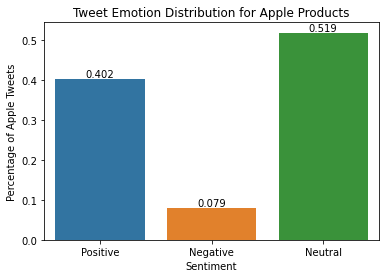

In [40]:
ax = sns.barplot(x = Emotion, y = Apple_Emotion_Dist)
plt.title('Tweet Emotion Distribution for Apple Products')
plt.xlabel('Sentiment')
plt.ylabel('Percentage of Apple Tweets')

for i, v in enumerate(Apple_Emotion_Dist):
    ax.text(i, v, format(v, '.3f'), ha='center', va='bottom')

Most tweets regarding to Apple products are neutral (51.9%), follow by positive (40.2%), and negative (7.9%). 

Almost more than half of the tweets have neutral sentiments.

To futher investigate, we will use WordCloud in the EDA notebook to what words occur most frequently among the three sentiments to discover some info about the texts to get more insights about what Apple is doing good, and what needs to improve.

Next, we can do the same for Google.
1. Find the positive review counts, negative counts, and neutral counts
2. Sum them out
3. Find the percentages for each emotion. Make a list Google_Emotion_Dist.
4. Visualize distribution.

In [41]:
Google_Pos_Count = len (df [(df['Brand'] == 'Google') & (df['Emotion'] == 'Positive') ])
Google_Neg_Count = len (df [(df['Brand'] == 'Google') & (df['Emotion'] == 'Negative') ])
Google_Neu_Count = len (df [(df['Brand'] == 'Google') & (df['Emotion'] == 'Neutral') ])
Google_total = Google_Pos_Count + Google_Neg_Count + Google_Neu_Count
Google_Pos_percent = Google_Pos_Count / Google_total
Google_Neg_percent = Google_Neg_Count / Google_total
Google_Neu_percent = Google_Neu_Count / Google_total


In [42]:
Google_Emotion_Dist = [Google_Pos_percent, Google_Neg_percent, Google_Neu_percent]
Google_Emotion_Dist

[0.28931904597303837, 0.05254061527825787, 0.6581403387487038]

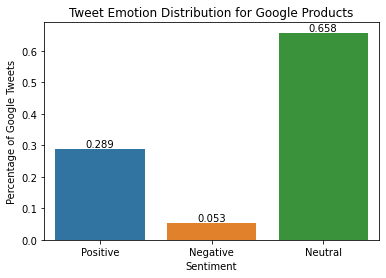

In [43]:
ax = sns.barplot(x = Emotion, y = Google_Emotion_Dist)
plt.title('Tweet Emotion Distribution for Google Products')
plt.xlabel('Sentiment')
plt.ylabel('Percentage of Google Tweets')

for i, v in enumerate(Google_Emotion_Dist):
    ax.text(i, v, format(v, '.3f'), ha='center', va='bottom')


For Google products, positive sentiments are 28.9%, negatives are 5.3%, and neutral are 65.8%.

Overall it seems like Apple has greater percentage of positive tweets than Google has. (40.2% vs. 28.9%)
Apple also has less neutral tweets than Google has. (51.9% vs 65.8%)


In [44]:
# Save the cleaned df to a new dataset
# df.to_csv('./Data/Cleaned_tweet_dataset.csv')